Automating Crypto Website API Pull

In [28]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [22]:
type(data)

dict

In [ ]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976515e+07,1.976515e+07,False,NaN,1,NaN,NaN,None,2024-10-09T05:15:00.000Z,62368.774075,2.759991e+10,-15.9339,0.020328,-0.298751,1.409181,13.826251,3.178595,7.777298,1.232728e+12,56.7863,1.309744e+12,None,2024-10-09T05:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:16:31.696334
1,1027,Ethereum,ETH,ethereum,9391,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203800e+08,1.203800e+08,True,NaN,2,NaN,NaN,None,2024-10-09T05:14:00.000Z,2442.920346,1.463254e+10,-7.7886,-0.066209,0.566935,-1.808444,6.405012,-6.115608,-20.984449,2.940787e+11,13.5432,2.940787e+11,None,2024-10-09T05:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:16:31.696334
2,825,Tether USDt,USDT,tether,99834,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.198482e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-09T05:14:00.000Z,0.999526,5.265536e+10,-11.0559,0.002086,-0.022868,-0.049801,-0.044663,-0.073845,-0.037586,1.197913e+11,5.5168,1.213060e+11,None,2024-10-09T05:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 12:16:31.696334
3,1839,BNB,BNB,bnb,2255,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459322e+08,1.459322e+08,False,NaN,4,NaN,NaN,None,2024-10-09T05:14:00.000Z,578.593080,2.284669e+09,37.0980,0.385467,1.764175,4.393765,14.978304,13.755596,10.034254,8.443539e+10,3.8896,8.443539e+10,None,2024-10-09T05:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:16:31.696334
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.692599e+08,5.861231e+08,True,NaN,5,NaN,NaN,None,2024-10-09T05:14:00.000Z,143.173724,1.640795e+09,-32.2917,-0.521560,-0.399759,-2.582448,11.831351,-6.692436,1.616015,6.718569e+10,3.0949,8.391742e+10,None,2024-10-09T05:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:16:31.696334
5,3408,USDC,USDC,usd-coin,22345,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.501060e+10,3.501060e+10,False,NaN,6,NaN,NaN,None,2024-10-09T05:14:00.000Z,0.999916,5.887412e+09,-8.7608,-0.003016,-0.002470,-0.009805,-0.016218,0.003201,0.006643,3.500764e+10,1.6122,3.500764e+10,None,2024-10-09T05:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 12:16:31.696334
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-09T05:14:00.000Z,0.532964,9.100996e+08,-18.9019,-0.011682,0.274756,-11.681234,0.838168,-9.142329,20.526495,3.018977e+10,1.3903,5.329639e+10,None,2024-10-09T05:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:16:31.696334
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.462904e+11,1.462904e+11,True,NaN,8,NaN,NaN,None,2024-10-09T05:14:00.000Z,0.108639,5.959997e+08,-24.9303,-0.331617,-0.252162,0.480946,12.660824,5.077014,0.738901,1.589290e+10,0.7318,1.589290e+10,None,2024-10-09T05:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:16:31.696334
8,1958,TRON,TRX,tron,1046,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.657099e+10,8.

In [57]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # df2 = pd.json_normalize(data['data'])
    # df2['timestamp'] = pd.to_datetime('now')
    # df = pd.concat([df, df2])

    # Creating CSV file

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'D:\Data Analyst Project\Python\Python Script\API.csv'):
        df.to_csv(r'D:\Data Analyst Project\Python\Python Script\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Data Analyst Project\Python\Python Script\API.csv', mode='a', header=False)

In [59]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [63]:
df5 = pd.read_csv(r'D:\Data Analyst Project\Python\Python Script\API.csv')
df5

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976515e+07,1.976515e+07,False,NaN,1,NaN,NaN,NaN,2024-10-09T05:45:00.000Z,62471.125050,2.759732e+10,-16.0135,0.180524,0.003410,1.618819,14.227834,3.403702,7.851599,1.234751e+12,56.7457,1.311894e+12,NaN,2024-10-09T05:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:46:37.771091
1,1,1027,Ethereum,ETH,ethereum,9391,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203800e+08,1.203800e+08,True,NaN,2,NaN,NaN,NaN,2024-10-09T05:44:00.000Z,2448.706370,1.452679e+10,-9.1168,0.180365,0.947425,-1.224797,6.675894,-6.036998,-20.794840,2.947752e+11,13.5507,2.947752e+11,NaN,2024-10-09T05:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:46:37.771091
2,2,825,Tether USDt,USDT,tether,99834,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.198482e+11,1.213636e+11,True,NaN,3,NaN,NaN,NaN,2024-10-09T05:44:00.000Z,0.999452,5.254632e+10,-11.5167,-0.014051,-0.030875,-0.034934,-0.046903,-0.090061,-0.078638,1.197824e+11,5.5064,1.212970e+11,NaN,2024-10-09T05:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 12:46:37.771091
3,3,1839,BNB,BNB,bnb,2255,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459322e+08,1.459322e+08,False,NaN,4,NaN,NaN,NaN,2024-10-09T05:44:00.000Z,580.076233,2.303481e+09,38.6012,0.329428,2.536777,4.885015,15.064738,13.938447,10.533265,8.465183e+10,3.8904,8.465183e+10,NaN,2024-10-09T05:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:46:37.771091
4,4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.692599e+08,5.861230e+08,True,NaN,5,NaN,NaN,NaN,2024-10-09T05:44:00.000Z,143.831833,1.613949e+09,-33.7428,0.133303,0.192077,-1.809380,11.995142,-6.428219,2.500585,6.749451e+10,3.1019,8.430315e+10,NaN,2024-10-09T05:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:46:37.771091
5,5,3408,USDC,USDC,usd-coin,22345,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.500577e+10,3.500577e+10,False,NaN,6,NaN,NaN,NaN,2024-10-09T05:44:00.000Z,0.999904,5.861644e+09,-9.2835,-0.009284,-0.007474,-0.005867,-0.010804,-0.007454,-0.000363,3.500242e+10,1.6091,3.500242e+10,NaN,2024-10-09T05:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 12:46:37.771091
6,6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,NaN,2024-10-09T05:44:00.000Z,0.533530,9.017892e+08,-20.0356,0.064196,0.762078,-11.131646,0.923025,-9.020067,20.773799,3.022184e+10,1.3893,5.335301e+10,NaN,2024-10-09T05:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:46:37.771091
7,7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.462907e+11,1.462907e+11,True,NaN,8,NaN,NaN,NaN,2024-10-09T05:44:00.000Z,0.109129,5.906021e+08,-25.9327,0.320161,1.063912,1.257797,13.077317,5.513154,1.329439,1.596457e+10,0.7339,1.596457e+10,NaN,2024-10-09T05:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:46:37.771091
8,8,1958,TRON,TRX,tron,1046,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.6570

In [67]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19765150.00000,19765150.00000,False,NaN,1,NaN,NaN,None,2024-10-09T05:50:00.000Z,62444.60121,27609479503.90262,-15.98200,0.26655,0.02947,1.61415,14.29736,3.30762,7.80969,1234226909694.67432,56.72660,1311336625504.38989,None,2024-10-09T05:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:51:43.604166
1,1027,Ethereum,ETH,ethereum,9391,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120379987.67888,120379987.67888,True,NaN,2,NaN,NaN,None,2024-10-09T05:49:00.000Z,2447.18208,14524776448.44998,-9.13510,0.28180,0.81336,-1.25956,6.98816,-6.10905,-20.85802,294591748457.43567,13.53900,294591748457.44000,None,2024-10-09T05:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:51:43.604166
2,825,Tether USDt,USDT,tether,99834,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119848153356.52142,121363587342.99321,True,NaN,3,NaN,NaN,None,2024-10-09T05:49:00.000Z,0.99938,52554813526.15636,-11.49880,-0.00628,-0.04388,-0.04380,-0.04843,-0.09487,-0.04836,119774231589.05602,5.50460,121288730863.10001,None,2024-10-09T05:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 12:51:43.604166
3,1839,BNB,BNB,bnb,2255,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932243.85615,145932243.85615,False,NaN,4,NaN,NaN,None,2024-10-09T05:49:00.000Z,580.14116,2303458997.57896,38.51490,0.36949,2.56376,4.89884,15.55392,13.90621,10.30818,84661301728.65709,3.89220,84661301728.66000,None,2024-10-09T05:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:51:43.604166
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469259883.12650,586123008.14874,True,NaN,5,NaN,NaN,None,2024-10-09T05:49:00.000Z,143.72110,1614009236.65247,-33.60520,0.23449,0.13593,-1.92315,12.50076,-6.65414,2.09276,67442547522.72832,3.10060,84238244632.94000,None,2024-10-09T05:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:51:43.604166
5,3408,USDC,USDC,usd-coin,22345,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35005767439.25113,35005767439.25113,False,NaN,6,NaN,NaN,None,2024-10-09T05:49:00.000Z,0.99981,5874852970.93458,-9.14190,-0.01594,-0.02141,-0.02103,-0.02039,-0.02060,-0.01280,34999067828.42263,1.60850,34999067828.42000,None,2024-10-09T05:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 12:51:43.604166
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56645058199.00000,99987139355.00000,False,NaN,7,NaN,NaN,None,2024-10-09T05:49:00.000Z,0.53316,900454610.60647,-20.21850,0.08132,0.65868,-11.22606,1.02973,-9.11654,20.53498,30201050719.18863,1.38800,53316302744.52000,None,2024-10-09T05:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 12:51:43.604166
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146290676383.70523,146290676383.70523,True,NaN,8,NaN,NaN,None,2024-10-09T05:50:00.000Z,0.10922,589718485.21075,-26.23240,0.59093,1.24110,1.22775,13.60461,5.45629,1.14910,15977275152.34063,0.73460,15977275152.34000,None,2024-10-09T05:50:00.000Z,NaN,NaN,Na

In [65]:
# Change the scientific number format to float
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [73]:
# Group by name
df6 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df6


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.26655,0.02947,1.61415,14.29736,3.30762,7.80969
Ethereum,0.28180,0.81336,-1.25956,6.98816,-6.10905,-20.85802
Tether USDt,-0.00628,-0.04388,-0.04380,-0.04843,-0.09487,-0.04836
BNB,0.36949,2.56376,4.89884,15.55392,13.90621,10.30818
Solana,0.23449,0.13593,-1.92315,12.50076,-6.65414,2.09276
USDC,-0.01594,-0.02141,-0.02103,-0.02039,-0.02060,-0.01280
XRP,0.08132,0.65868,-11.22606,1.02973,-9.11654,20.53498
Dogecoin,0.59093,1.24110,1.22775,13.60461,5.45629,1.14910
TRON,-0.00157,2.47486,3.54301,4.05443,23.88055,19.99862


In [75]:
#changinf data format : dataframe -> stack (series)
df7 = df6.stack()
df7

name                                      
Bitcoin       quote.USD.percent_change_1h      0.26655
              quote.USD.percent_change_24h     0.02947
              quote.USD.percent_change_7d      1.61415
              quote.USD.percent_change_30d    14.29736
              quote.USD.percent_change_60d     3.30762
              quote.USD.percent_change_90d     7.80969
Ethereum      quote.USD.percent_change_1h      0.28180
              quote.USD.percent_change_24h     0.81336
              quote.USD.percent_change_7d     -1.25956
              quote.USD.percent_change_30d     6.98816
              quote.USD.percent_change_60d    -6.10905
              quote.USD.percent_change_90d   -20.85802
Tether USDt   quote.USD.percent_change_1h     -0.00628
              quote.USD.percent_change_24h    -0.04388
              quote.USD.percent_change_7d     -0.04380
              quote.USD.percent_change_30d    -0.04843
              quote.USD.percent_change_60d    -0.09487
              quote.US

In [81]:
type(df7)

pandas.core.series.Series

In [83]:
df8 = df7.to_frame(name='values')
df8

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.26655
             quote.USD.percent_change_24h   0.02947
             quote.USD.percent_change_7d    1.61415
             quote.USD.percent_change_30d  14.29736
             quote.USD.percent_change_60d   3.30762
             quote.USD.percent_change_90d   7.80969
Ethereum     quote.USD.percent_change_1h    0.28180
             quote.USD.percent_change_24h   0.81336
             quote.USD.percent_change_7d   -1.25956
             quote.USD.percent_change_30d   6.98816
             quote.USD.percent_change_60d  -6.10905
             quote.USD.percent_change_90d -20.85802
Tether USDt  quote.USD.percent_change_1h   -0.00628
             quote.USD.percent_change_24h  -0.04388
             quote.USD.percent_change_7d   -0.04380
             quote.USD.percent_change_30d  -0.04843
             quote.USD.percent_change_60d  -0.09487
             quote.USD.percent_change_90d  -0.04836
BNB          quote.USD.percent_change_1h    0.36949
             quote.USD.percent_change_24h   2.56376
             quote.USD.percent_change_7d    4.89884
             quote.USD.percent_change_30d  15.55392
             quote.USD.percent_change_60d  13.90621
             quote.USD.percent_change_90d  10.30818
Solana       quote.USD.percent_change_1h    0.23449
             quote.USD.percent_change_24h   0.13593
             quote.USD.percent_change_7d   -1.92315
             quote.USD.percent_change_30d  12.50076
             quote.USD.percent_change_60d  -6.65414
             quote.USD.percent_change_90d   2.09276
USDC         quote.USD.percent_change_1h   -0.01594
             quote.USD.percent_change_24h  -0.02141
             quote.USD.percent_change_7d   -0.02103
             quote.USD.percent_change_30d  -0.02039
             quote.USD.percent_change_60d  -0.02060
             quote.USD.percent_change_90d  -0.01280
XRP          quote.USD.percent_change_1h    0.08132
             quote.USD.percent_change_24h   0.65868
             quote.USD.percent_change_7d  -11.22606
             quote.USD.percent_change_30d   1.02973
             quote.USD.percent_change_60d  -9.11654
             quote.USD.percent_change_90d  20.53498
Dogecoin     quote.USD.percent_change_1h    0.59093
             quote.USD.percent_change_24h   1.24110
             quote.USD.percent_change_7d    1.22775
             quote.USD.percent_change_30d  13.60461
             quote.USD.percent_change_60d   5.45629
             quote.USD.percent_change_90d   1.14910
TRON         quote.USD.percent_change_1h   -0.00157
             quote.USD.percent_change_24h   2.47486
             quote.USD.percent_change_7d    3.54301
             quote.USD.percent_change_30d   4.05443
             quote.USD.percent_change_60d  23.88055
             quote.USD.percent_change_90d  19.99862
Toncoin      quote.USD.percent_change_1h    0.34328
             quote.USD.percent_change_24h   0.82259
             quote.USD.percent_change_7d   -4.08713
             quote.USD.percent_change_30d   6.40618
             quote.USD.percent_change_60d -21.75137
             quote.USD.percent_change_90d -27.05993
Cardano      quote.USD.percent_change_1h    0.42098
             quote.USD.percent_change_24h  -1.34911
             quote.USD.percent_change_7d   -2.82401
             quote.USD.percent_change_30d   1.98957
             quote.USD.percent_change_60d   0.37928
             quote.USD.percent_change_90d -11.43494
Avalanche    quote.USD.percent_change_1h    0.69443
             quote.USD.percent_change_24h  -0.23222
             quote.USD.percent_change_7d    1.04015
             quote.USD.percent_change_30d  14.02089
             quote.USD.percent_change_60d  23.13517
             quote.USD.percent_change_90d   3.28218
Shiba Inu    quote.USD.percent_change_1h    1.84829
             quote.USD.percent_change_24h   2.93411
             quote.USD.percent_change_7d    6.45242
             quote.USD.percent_change_30d

In [89]:
df8.count()

values    90
dtype: int64

In [95]:
# adding an index
index = pd.Index(range(90))

df9 = df8.reset_index()
df9

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.26655
1,Bitcoin,quote.USD.percent_change_24h,0.02947
2,Bitcoin,quote.USD.percent_change_7d,1.61415
3,Bitcoin,quote.USD.percent_change_30d,14.29736
4,Bitcoin,quote.USD.percent_change_60d,3.30762
5,Bitcoin,quote.USD.percent_change_90d,7.80969
6,Ethereum,quote.USD.percent_change_1h,0.28180
7,Ethereum,quote.USD.percent_change_24h,0.81336
8,Ethereum,quote.USD.percent_change_7d,-1.25956
9,Ethereum,quote.USD.percent_change_30d,6.98816


In [99]:
# change column name
df10 = df9.rename(columns={'level_1':'percent_change'})
df10

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26655
1,Bitcoin,quote.USD.percent_change_24h,0.02947
2,Bitcoin,quote.USD.percent_change_7d,1.61415
3,Bitcoin,quote.USD.percent_change_30d,14.29736
4,Bitcoin,quote.USD.percent_change_60d,3.30762
5,Bitcoin,quote.USD.percent_change_90d,7.80969
6,Ethereum,quote.USD.percent_change_1h,0.28180
7,Ethereum,quote.USD.percent_change_24h,0.81336
8,Ethereum,quote.USD.percent_change_7d,-1.25956
9,Ethereum,quote.USD.percent_change_30d,6.98816


In [113]:
#changing data format in the percent_change column
df10['percent_change'] = df10['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df10

,name,percent_change,values
0,Bitcoin,1h,0.26655
1,Bitcoin,24h,0.02947
2,Bitcoin,7d,1.61415
3,Bitcoin,30d,14.29736
4,Bitcoin,60d,3.30762
5,Bitcoin,90d,7.80969
6,Ethereum,1h,0.28180
7,Ethereum,24h,0.81336
8,Ethereum,7d,-1.25956
9,Ethereum,30d,6.98816


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

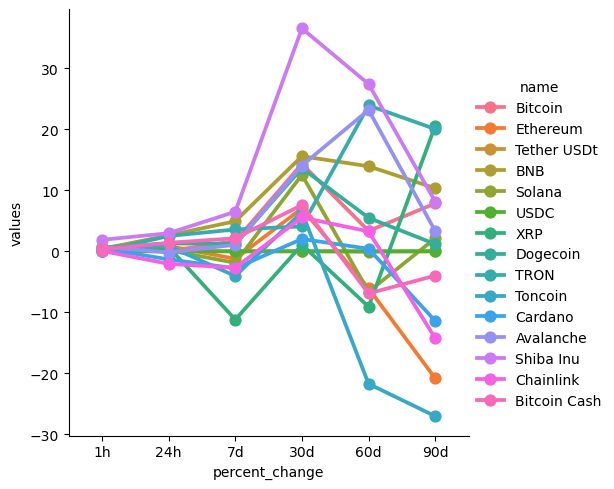

In [115]:
sns.catplot(x='percent_change', y='values', hue='name', data=df10, kind='point')

In [123]:
df11 = df6[['name','quote.USD.price','timestamp']]
df11 = df11.query("name == 'Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,62471.12505,2024-10-09 12:46:37.771091
15,Bitcoin,62471.12505,2024-10-09 12:47:38.665178
30,Bitcoin,62426.94841,2024-10-09 12:48:41.042809
45,Bitcoin,62442.26292,2024-10-09 12:49:41.972028
60,Bitcoin,62442.26292,2024-10-09 12:50:42.457437
75,Bitcoin,62444.60121,2024-10-09 12:51:43.604166


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

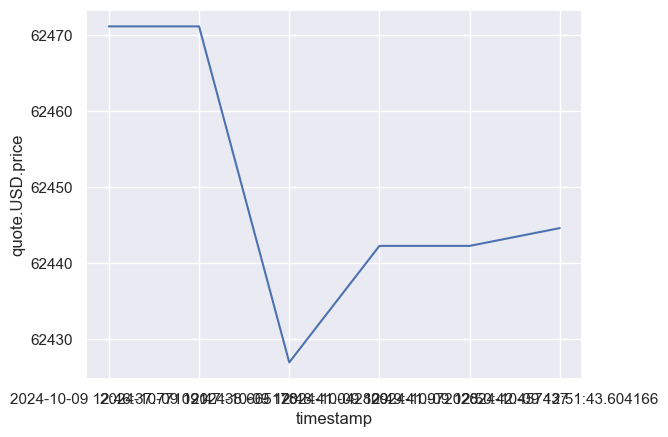

In [125]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df11)